In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

import acquire as ac
import prepare as pr


# Part I
Do these exercises in explore.ipynb notebook. As always, add, commit, and push your changes. <br>
***Section 1*** - iris_db: Using iris data from our MySQL server and the methods used in the lesson above:

### 1. Acquire, prepare & split your data.

In [2]:
iris = ac.get_iris_data()
iris.head(2)

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2


In [3]:
iris_2 = ac.get_iris_data()
iris.head(2)

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2


#### Prepare Notes: 
- drop columns that are not relevant: species_id
- rename species_id to species

In [4]:
# use the function to clean up the data
iris_2 = pr.clean_iris(iris_2)

In [5]:
# drop the column name: 
iris = iris.drop(columns='species_id')

In [6]:
# rename the species_name to species
iris = iris.rename(columns={'species_name':'species'})

In [7]:
# create a dummy:
dummy_df = pd.get_dummies(iris[['species']], drop_first = True)
dummy_df.head()

,species_versicolor,species_virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [8]:
# concat or add dummies to iris data
iris = pd.concat([iris, dummy_df], axis = 1)

In [9]:
iris_2.head(2)

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0


In [10]:
iris.head(2)

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0


#### split data

In [11]:
# using split_data function:

In [12]:
train, validate, test = pr.split_data(iris, 'iris')
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
138,virginica,6.0,3.0,4.8,1.8,0,1
7,setosa,5.0,3.4,1.5,0.2,0,0
79,versicolor,5.7,2.6,3.5,1.0,1,0
74,versicolor,6.4,2.9,4.3,1.3,1,0
97,versicolor,6.2,2.9,4.3,1.3,1,0


### 2. Univariate Stats
- For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

- For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

- Document takeaways & any actions.

In [13]:
# partition out x(independent vars, features)
# partition out y (dependent var, target)
x_train = train.drop(columns='species')
y_train = train[['species']]

#for utility:  set a variable for a target variable
target = 'species'

In [14]:
# split up the x variables into categorical and numerical:
cat_cols, num_cols = [], []
# for a column in the x_train data frame:
for col in x_train.columns:
    # if the column is an object:
    if x_train[col].dtype == 'O':
        # add the column to the category list
        cat_cols.append(col)
    # else not an object:   
    else:
        # if the column has unique values under 10:
        if x_train[col].nunique() < 10:
            # add the columns to category list
            cat_cols.append(col)
        # else not object and unique is not under 10:
        else:
            # and the column to the numbers list
            num_cols.append(col)

In [15]:
# a way to have each function separate for understanding:
cat_cols = []

for col in x_train.columns:
    if x_train[col].dtype == 'O' or x_train[col].nunique() < 10:
        cat_cols.append(col)

In [16]:
# a way to have each function separate for understanding:
num_cols = []

for col in x_train.columns:
    if x_train[col].dtype != 'O' and x_train[col].nunique() >= 10:
        num_cols.append(col)

In [17]:
cat_cols

['species_versicolor', 'species_virginica']

In [18]:
num_cols

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

##### a. graphs quantitative:

Distribution of sepal_length


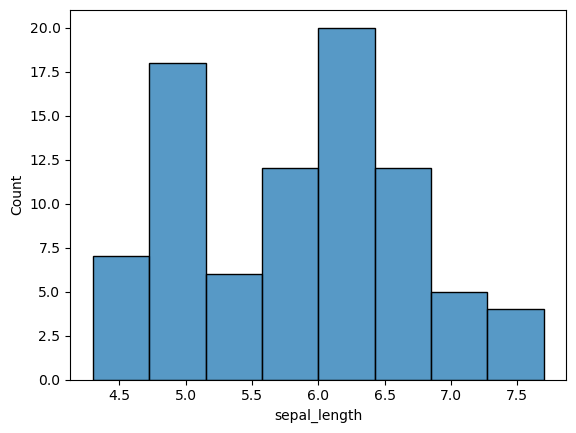

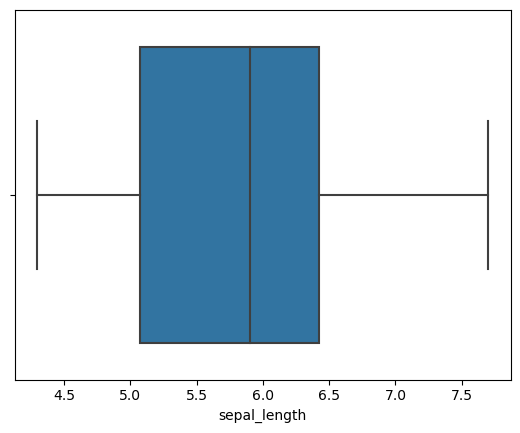

Distribution of sepal_width


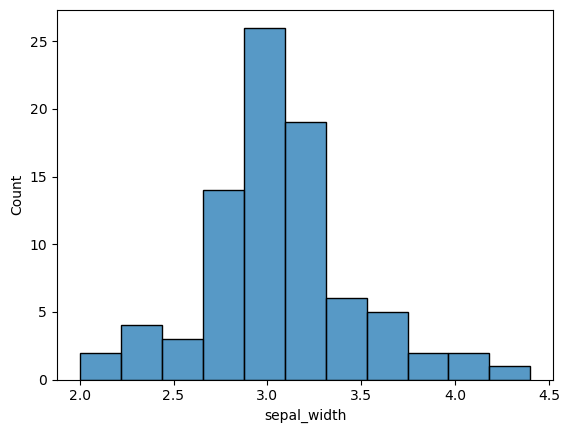

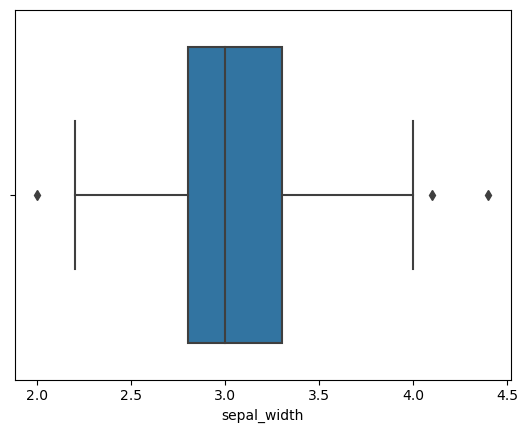

Distribution of petal_length


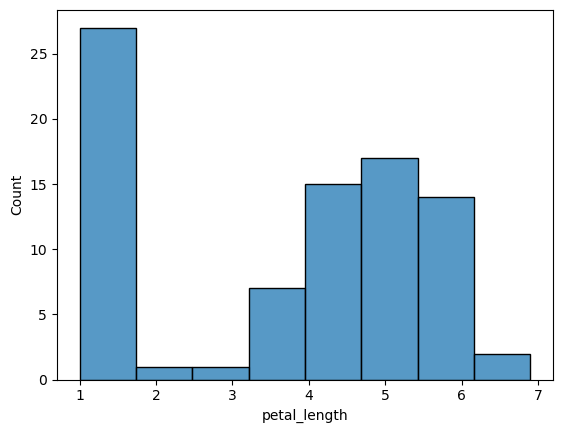

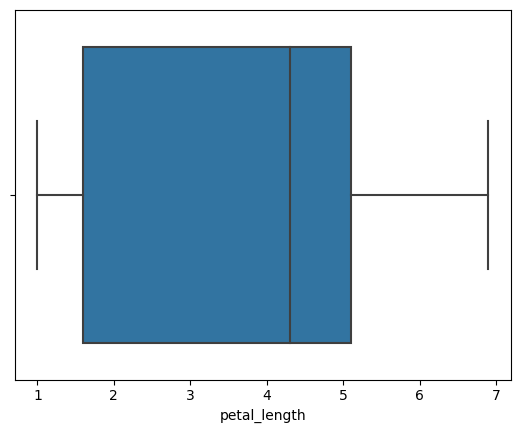

Distribution of petal_width


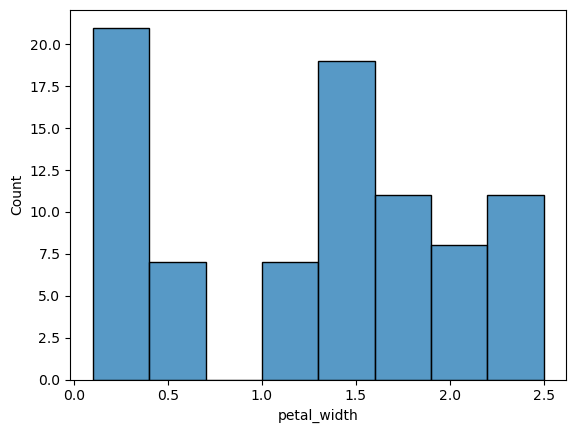

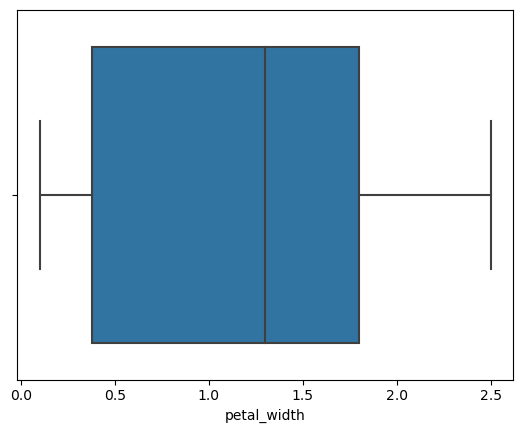

In [19]:
# making a for loop makes things go by much faster:
# Quantitative first:
for col in num_cols:
    # print out the title:
    print (f'Distribution of {col}')
    # first graph is a histogram: 
    sns.histplot(data=train, x = col)
    plt.show()
    # second graph is boxplot
    #plt.boxplot(train[col])
    #plt.show()
    sns.boxplot(data=train, x = col)
    plt.show()
    print('=======================')

##### b. graph categorical:

In [20]:
# frequcny table: 
frequency = train['species'].value_counts()
frequency

virginica     28
setosa        28
versicolor    28
Name: species, dtype: int64

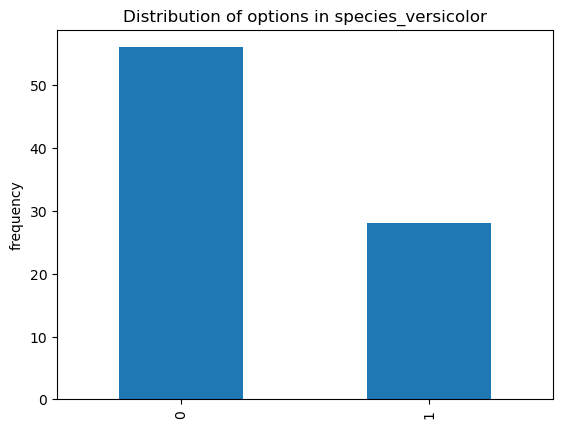

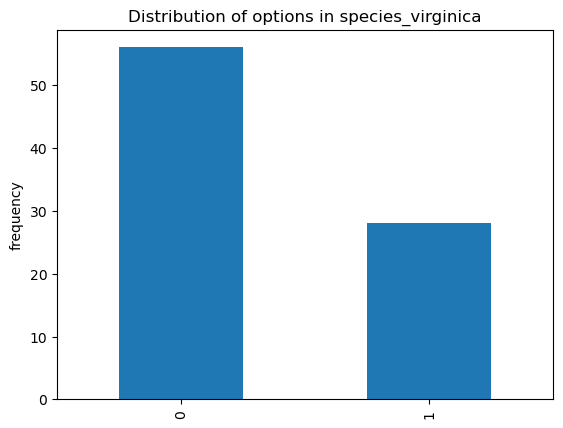

In [21]:
# note to self 1 = species is present. 0 = not this species
for col in cat_cols:
    train[col].value_counts().plot(
        kind='bar').set(
        title=f'Distribution of options in {col}')
    plt.ylabel("frequency")
    plt.show()

##### Takeaway:
- There is an even amount of virginica, versicolor, and setosa.
- the majority of sepal length is around 6.0
- the majority of sepal width is under 3.5. It has some outliers
- petal length is everywhere, mean around 4.5
- petal width is mostly is around 1.5

### 3. Bivariate Stats
- Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

- For each measurement type, compute the descriptive statistics for each species.

- For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

- Document takeaways & any actions.

In [22]:
# need to get the mean lenghts of the measurments:
mean_sepal_length = train.sepal_length.mean()
mean_sepal_width = train.sepal_width.mean()
mean_petal_length = train.petal_length.mean()
mean_petal_width = train.petal_width.mean()

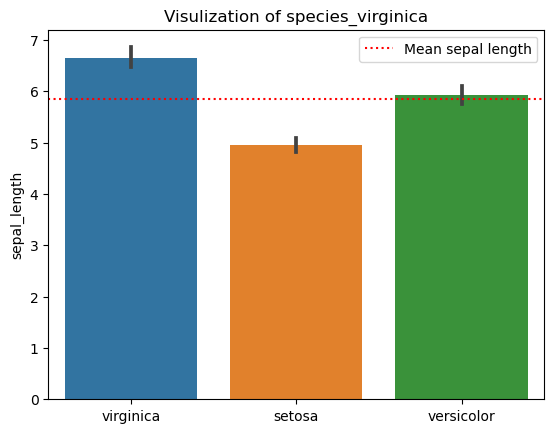

In [23]:
# need to create barplot's with a horizontal line: 
# sepal_length:
plt.title(f'Visulization of {col}')
# calling seaborn for a bar plot, specifying species and sepal length
sns.barplot(x="species", y="sepal_length", data=train)
# annotate a mean of the sepal length
# place the calculated mean as a horizontal axis line
plt.axhline(mean_sepal_length, label="Mean sepal length", color='red', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()
    

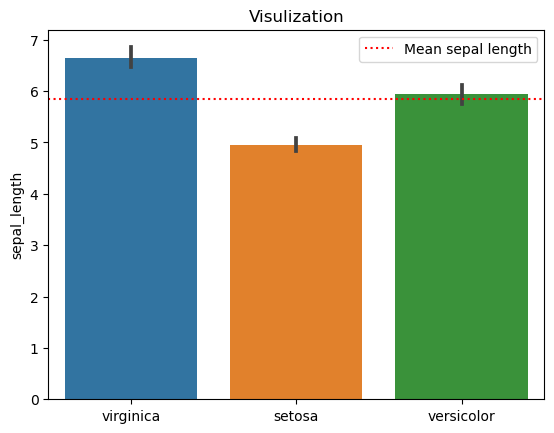

count    84.000000
mean      5.847619
std       0.841324
min       4.300000
25%       5.075000
50%       5.900000
75%       6.425000
max       7.700000
Name: sepal_length, dtype: float64


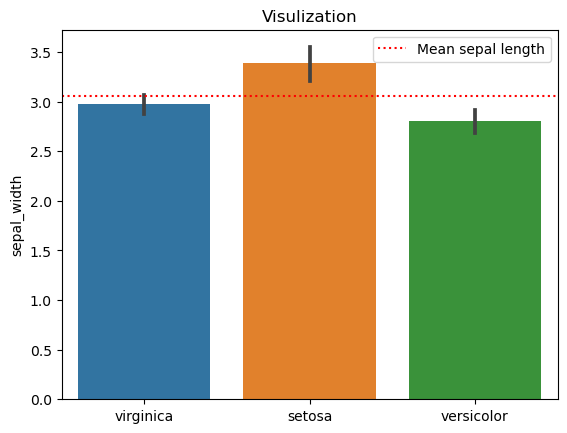

count    84.000000
mean      3.053571
std       0.417233
min       2.000000
25%       2.800000
50%       3.000000
75%       3.300000
max       4.400000
Name: sepal_width, dtype: float64


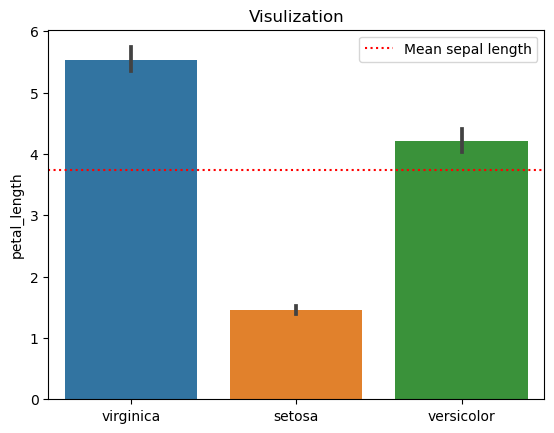

count    84.000000
mean      3.738095
std       1.765459
min       1.000000
25%       1.600000
50%       4.300000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64


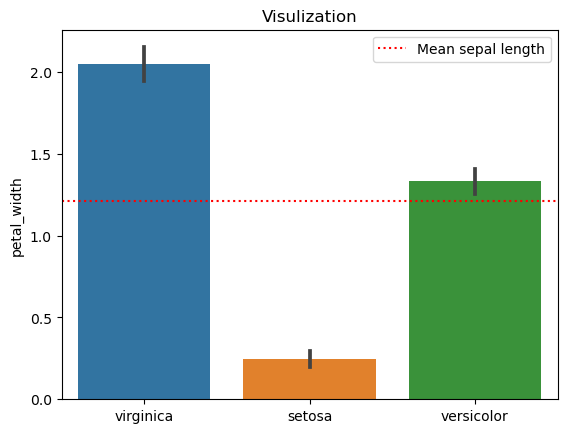

count    84.000000
mean      1.208333
std       0.775717
min       0.100000
25%       0.375000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64


In [24]:
for col in num_cols:
    plt.title('Visulization')
    sns.barplot(x=target, y= col, data=train)
    col_mean = train[col].mean()
    plt.axhline(col_mean, label="Mean sepal length", color='red', linestyle='dotted')
    plt.xlabel('')
    plt.legend()
    plt.show()
    print(train[col].describe())

##### For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

$H_0$: There is no difference between versicolor and viriginica petal length.
<br>
$H_a$: There is a difference between versicolor and viriginica petal length.

In [25]:
# Mann_Whitney: 
versicolor = train[train.species =='versicolor']
virginica = train[train.species=='virginica']

stat, p_val = stats.mannwhitneyu(versicolor['petal_length'], virginica['petal_length'])
if p_val < 0.05:
    print('We can reject the null hypothesis; the means are different.')
else:
    print('We cannot reject the null hypothesis')

We can reject the null hypothesis; the means are different.


### 4. Multivariate Stats
- Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

- Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

- Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

- Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

- Document takeaways and any actions

Comparision of sepal_length with species


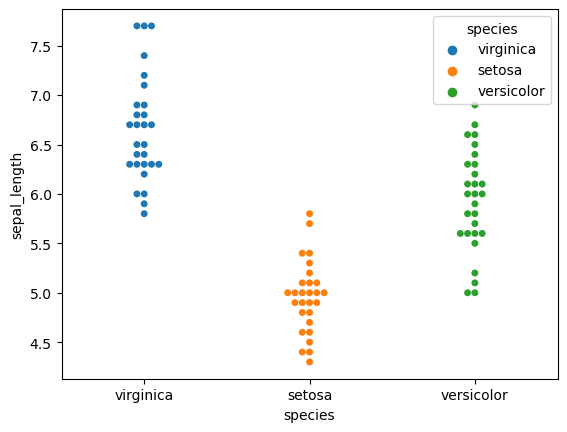

Comparision of sepal_width with species


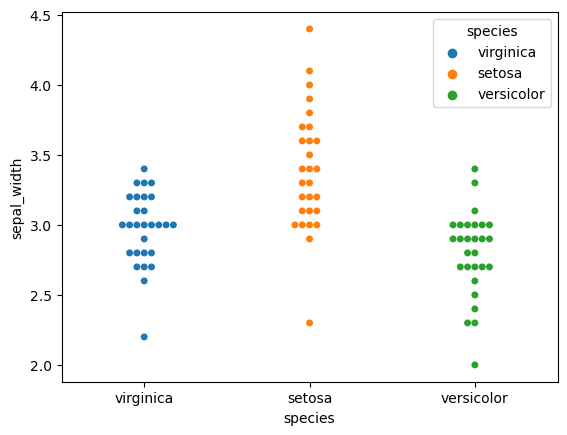

Comparision of petal_length with species


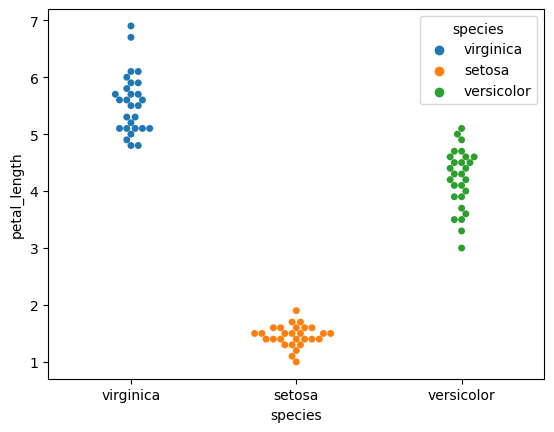

Comparision of petal_width with species


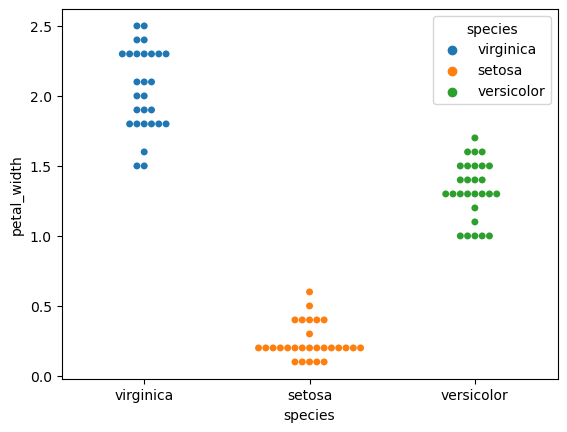

In [26]:
for col in num_cols:
    print (f'Comparision of {col} with species')
    sns.swarmplot(
        data=train,
        x=target,
        y=col,
        hue = target)
    plt.show()

In [27]:
train_melt = train.melt(id_vars='species',
           var_name='measurement')
train_melt.head()

,species,measurement,value
0,virginica,sepal_length,6.0
1,setosa,sepal_length,5.0
2,versicolor,sepal_length,5.7
3,versicolor,sepal_length,6.4
4,versicolor,sepal_length,6.2


In [28]:
train_melt = train_melt[((train_melt.measurement == 'sepal_length') | (train_melt.measurement == 'sepal_width') | (train_melt.measurement == 'petal_length') | (train_melt.measurement == 'petal_width'))]
train_melt.head()

,species,measurement,value
0,virginica,sepal_length,6.0
1,setosa,sepal_length,5.0
2,versicolor,sepal_length,5.7
3,versicolor,sepal_length,6.4
4,versicolor,sepal_length,6.2


<Axes: xlabel='measurement', ylabel='value'>

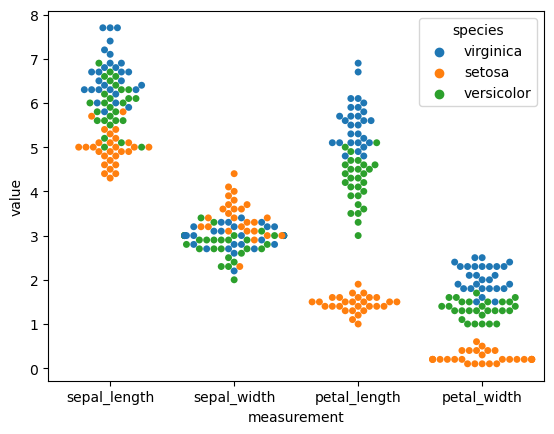

In [29]:
sns.swarmplot(x=train_melt.measurement, y=train_melt.value, hue = 'species', data=train_melt)

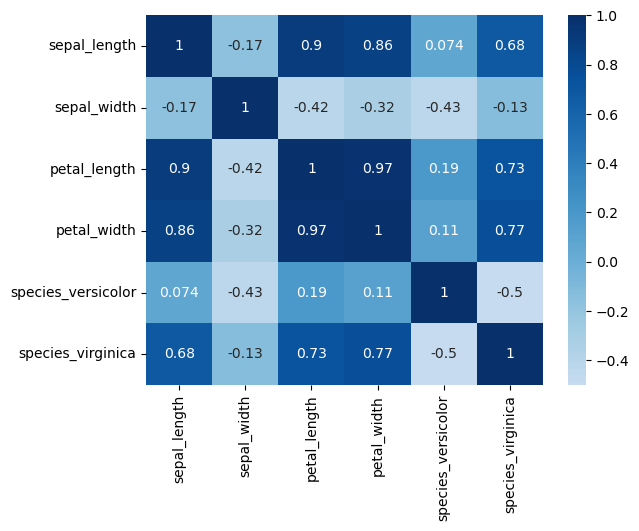

In [30]:
# compute pairwise correlation of columns.
train.corr()
sns.heatmap(train.corr(), cmap='Blues', center=0, annot=True)
plt.show()

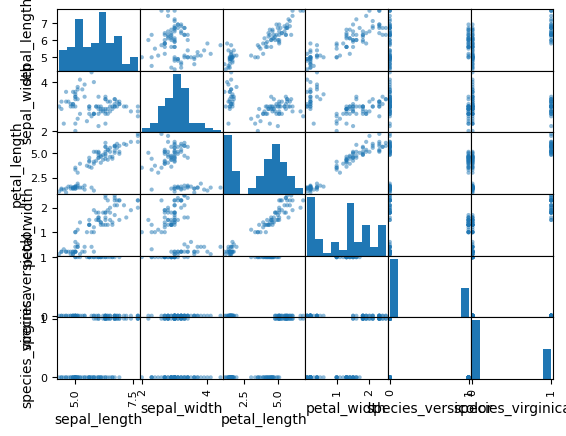

In [31]:
pd.plotting.scatter_matrix(train)
plt.show()

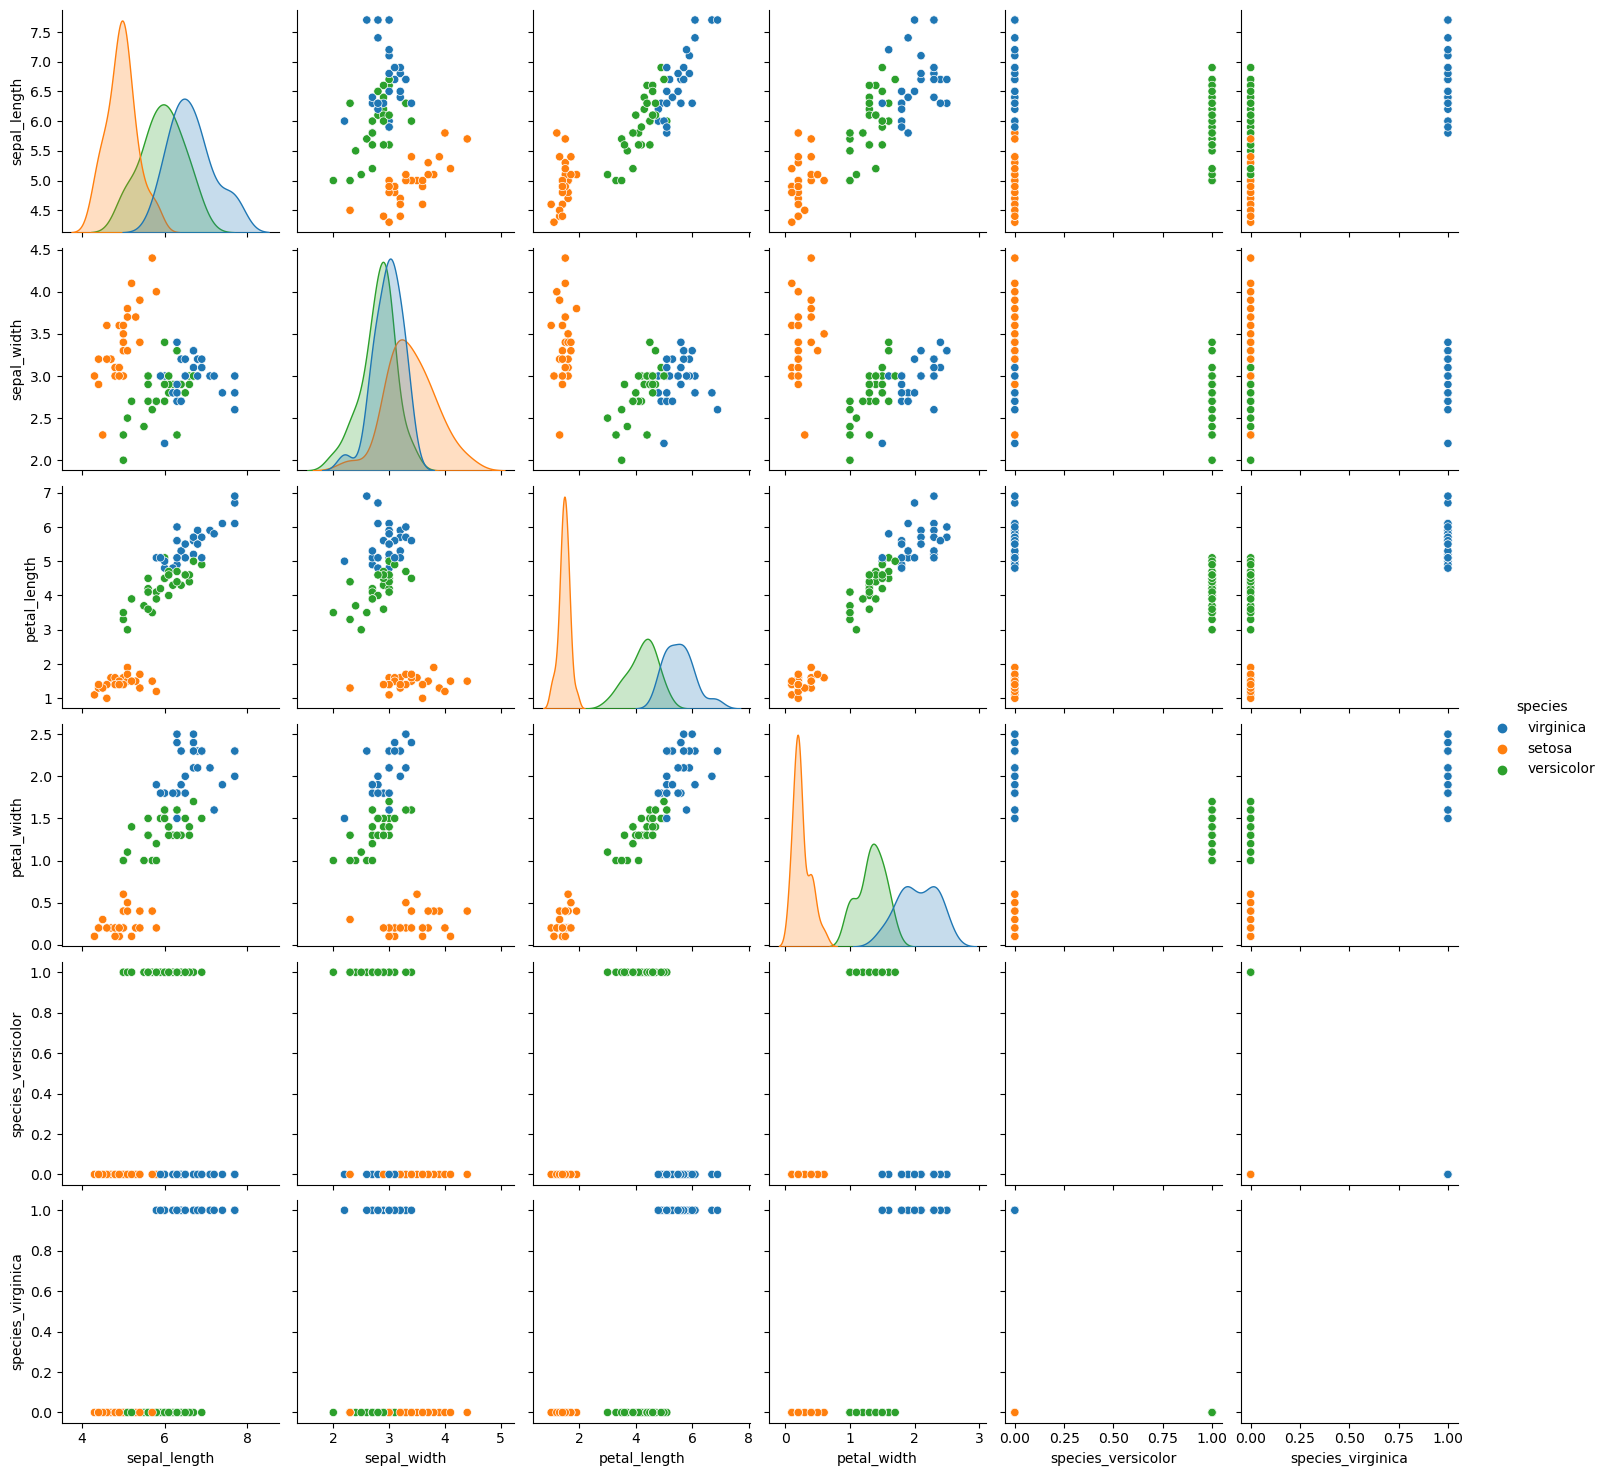

In [32]:
sns.pairplot(train, hue ='species')
plt.show()

# Part II
Explore your titanic dataset more completely.

Determine drivers of the target variable
Determine if certain columns should be dropped
Determine if it would be valuable to bin some numeric columns
Determine if it would be valuable to combine multiple columns into one.
Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown. 

In [33]:
titanic = ac.get_titanic_data()
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [34]:
import prepare as pr
train, val, test = pr.split_data(titanic, 'titanic')
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
474,474,0,3,female,22.0,0,0,9.8375,S,Third,None,Southampton,1
370,370,1,1,male,25.0,1,0,55.4417,C,First,E,Cherbourg,0
573,573,1,3,female,NaN,0,0,7.7500,Q,Third,None,Queenstown,1
110,110,0,1,male,47.0,0,0,52.0000,S,First,C,Southampton,1
167,167,0,3,female,45.0,1,4,27.9000,S,Third,None,Southampton,0


In [35]:
pr.prep_titanic_2(train)

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
474,0,3,female,22.0,0,0,9.8375,Southampton,1
370,1,1,male,25.0,1,0,55.4417,Cherbourg,0
573,1,3,female,31.0,0,0,7.7500,Queenstown,1
110,0,1,male,47.0,0,0,52.0000,Southampton,1
167,0,3,female,45.0,1,4,27.9000,Southampton,0
...,...,...,...,...,...,...,...,...,...
735,0,3,male,28.5,0,0,16.1000,Southampton,1
163,0,3,male,17.0,0,0,8.6625,Southampton,1
770,0,3,male,24.0,0,0,9.5000,Southampton,1
196,0,3,male,31.0,0,0,7.7500,Queenstown,1


In [37]:
# create num and categorical columns 
col_cat = [] #this is for my categorical varibles
col_num = [] #this is for my numeric varibles

for col in train.columns[:-3]:
    print(col)
    if train[col].dtype == 'O':
        col_cat.append(col)
    else:
        if len(train[col].unique()) < 4: #making anything with less than 4 unique values a catergorical value
            col_cat.append(col)
        else:
            col_num.append(col)


passenger_id
survived
pclass
sex
age
sibsp
parch
fare
embarked
class


In [38]:
col_cat

['survived', 'pclass', 'sex', 'embarked', 'class']

In [39]:
col_num

['passenger_id', 'age', 'sibsp', 'parch', 'fare']

SURVIVED
0    307
1    191
Name: survived, dtype: int64
0    0.616466
1    0.383534
Name: survived, dtype: float64


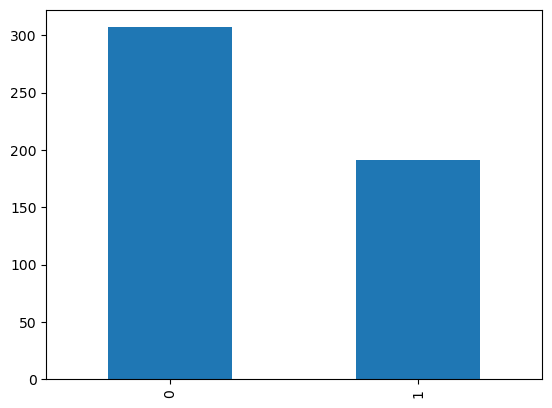


PCLASS
3    277
1    126
2     95
Name: pclass, dtype: int64
3    0.556225
1    0.253012
2    0.190763
Name: pclass, dtype: float64


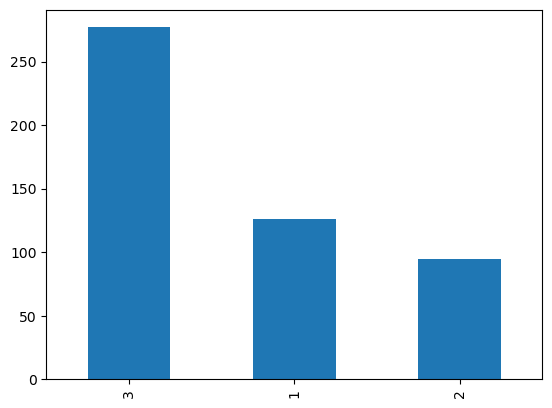


SEX
male      324
female    174
Name: sex, dtype: int64
male      0.650602
female    0.349398
Name: sex, dtype: float64


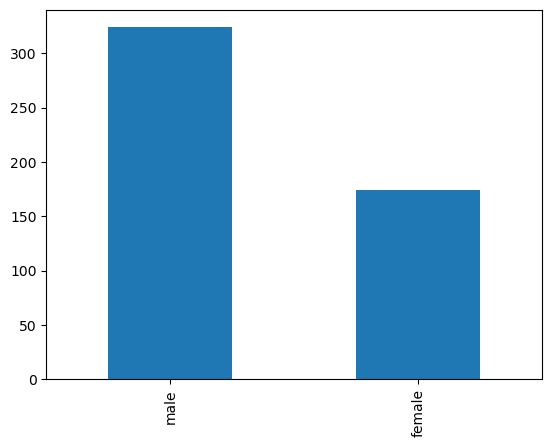


EMBARKED
S    358
C     91
Q     47
Name: embarked, dtype: int64
S    0.721774
C    0.183468
Q    0.094758
Name: embarked, dtype: float64


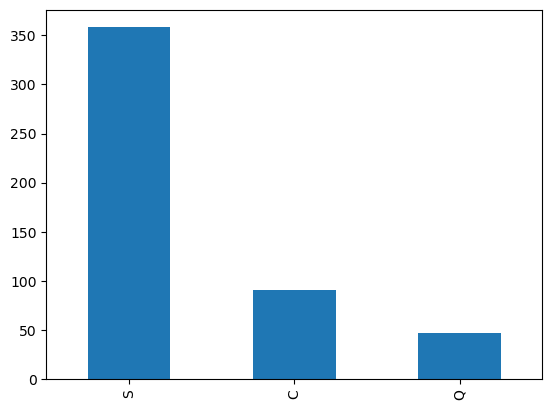


CLASS
Third     277
First     126
Second     95
Name: class, dtype: int64
Third     0.556225
First     0.253012
Second    0.190763
Name: class, dtype: float64


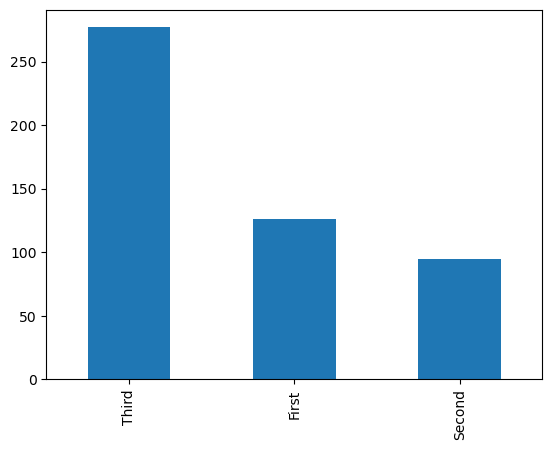

In [42]:
for col in col_cat:
    print(col.upper())
    print(train[col].value_counts())
    print(train[col].value_counts(normalize=True))
    train[col].value_counts().plot.bar()
    plt.show()
    print()

PASSENGER_ID
474    1
117    1
834    1
153    1
695    1
      ..
525    1
241    1
170    1
405    1
94     1
Name: passenger_id, Length: 498, dtype: int64
Axes(0.125,0.11;0.775x0.77)


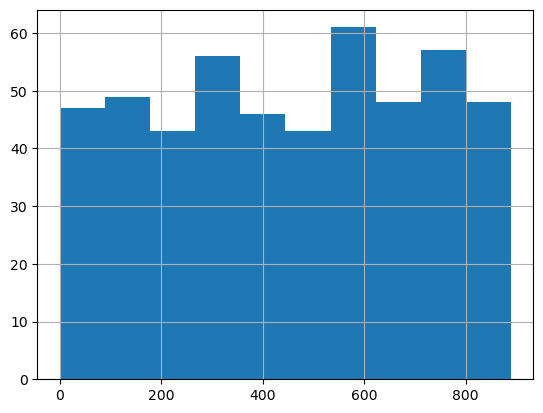

AGE
24.00    19
30.00    15
25.00    15
35.00    14
28.00    14
18.00    14
22.00    13
36.00    12
19.00    12
31.00    12
26.00    11
29.00    10
27.00    10
39.00     9
33.00     9
23.00     9
21.00     9
34.00     9
45.00     8
16.00     8
17.00     7
32.00     7
40.00     7
50.00     7
42.00     6
4.00      6
47.00     5
20.00     5
54.00     5
49.00     5
2.00      4
38.00     4
41.00     4
51.00     4
3.00      4
37.00     4
43.00     4
52.00     4
9.00      4
58.00     4
15.00     4
1.00      4
8.00      3
44.00     3
48.00     3
11.00     3
6.00      2
61.00     2
28.50     2
71.00     2
65.00     2
10.00     2
14.00     2
40.50     2
59.00     2
63.00     2
60.00     2
30.50     2
64.00     1
55.50     1
32.50     1
66.00     1
13.00     1
0.83      1
34.50     1
56.00     1
70.50     1
62.00     1
55.00     1
0.67      1
70.00     1
7.00      1
46.00     1
45.50     1
57.00     1
Name: age, dtype: int64
Axes(0.125,0.11;0.775x0.77)


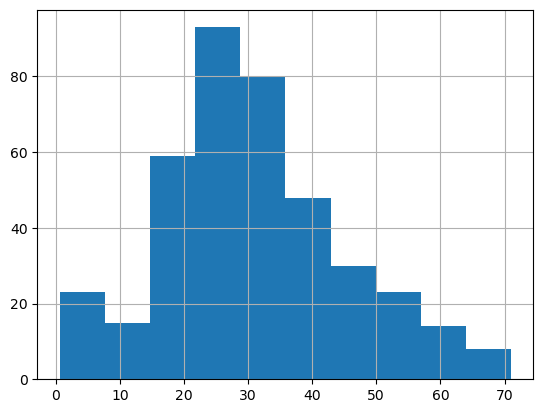

SIBSP
0    341
1    115
2     12
3     11
4     10
8      6
5      3
Name: sibsp, dtype: int64
Axes(0.125,0.11;0.775x0.77)


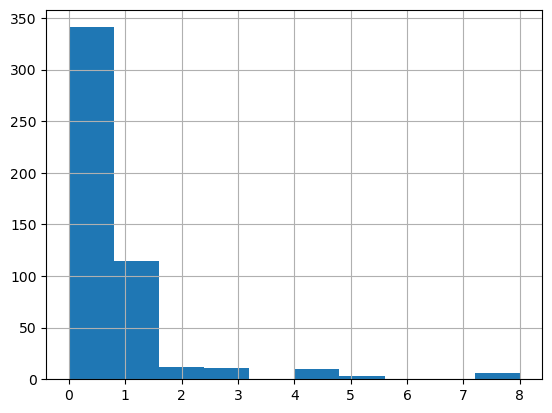

PARCH
0    383
1     57
2     50
5      4
4      2
3      2
Name: parch, dtype: int64
Axes(0.125,0.11;0.775x0.77)


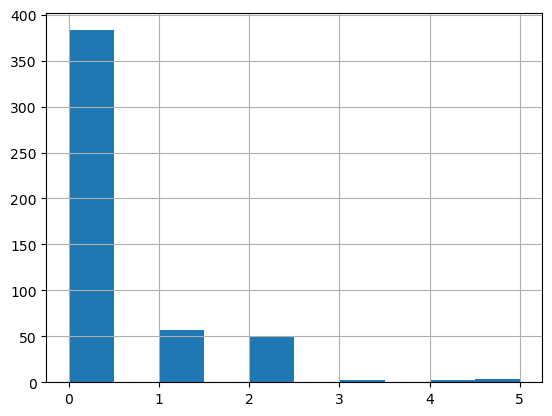

FARE
8.0500     28
13.0000    27
7.7500     24
7.8958     24
26.0000    14
           ..
33.5000     1
55.4417     1
41.5792     1
69.3000     1
12.3500     1
Name: fare, Length: 186, dtype: int64
Axes(0.125,0.11;0.775x0.77)


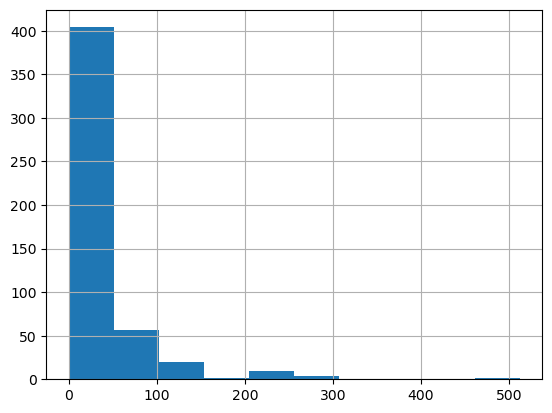

In [43]:
for col in col_num:
    print(col.upper())
    print(train[col].value_counts())
    print(train[col].hist())
    plt.show()

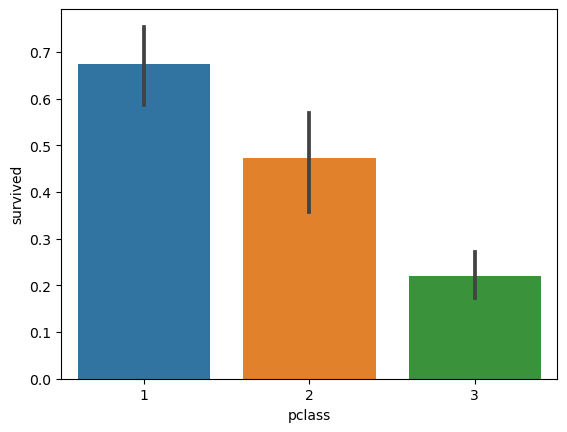

In [44]:
# class looks like a good one to dig into 
sns.barplot(data=train, x='pclass', y='survived')
plt.show()

In [45]:
# do test: categorical vs categorical
observed = pd.crosstab(train.pclass, train.survived)
observed

survived,0,1
pclass,,
1,41,85
2,50,45
3,216,61


In [46]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [47]:
p

5.027251352127074e-18

The p-value is less than alpha, therefore, we reject the null hypothesis

# Part III
Explore your telco data to discover drivers of churn
Determine if certain columns should be dropped
Determine if it would be valuable to bin some numeric columns
Determine if it would be valuable to combine multiple columns into one.
What are your drivers of churn?

Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.